<a href="https://colab.research.google.com/github/Silva-TI/MachineLearning-Silva/blob/main/Latihan13_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
kaggle = '/content/kaggle.json'

In [3]:
!mkdir -p ~/.kaggle
!cp {kaggle} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 1.23GB/s]


In [5]:
from zipfile import ZipFile
import os
file_name = '/content/handwritten-digits-0-9.zip'

extract_folder = 'dataset'
os.makedirs(extract_folder, exist_ok=True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
data_0 = os.listdir('/content/0')
data_1 = os.listdir('/content/1')
data_2 = os.listdir('/content/2')
data_3 = os.listdir('/content/3')
data_4 = os.listdir('/content/4')
data_5 = os.listdir('/content/5')
data_6 = os.listdir('/content/6')
data_7 = os.listdir('/content/7')
data_8 = os.listdir('/content/8')
data_9 = os.listdir('/content/9')

In [7]:
len(data_0)

2236

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
# Memuat dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisasi pixel (0-255) menjadi (0-1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Mengubah label menjadi format one-hot encoding (karena klasifikasi 10 kelas: angka 0-9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [41]:
model = Sequential()

# Mengubah gambar 28x28 menjadi vektor 784 komponen
model.add(Flatten(input_shape=(28, 28)))

# Hidden Layer 1 (Menggunakan ReLU seperti pada modul [cite: 70, 73])
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# Hidden Layer 2
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

# Output Layer (10 neuron untuk angka 0-9)
# Menggunakan 'softmax' untuk klasifikasi multi-kelas [cite: 15, 182]
model.add(Dense(10, activation='softmax'))

In [42]:
# Inisialisasi Early Stopping [cite: 88, 90, 92]
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
    )

In [43]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Melatih model [cite: 98, 101, 102]
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
    )

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7498 - loss: 13.1968 - val_accuracy: 0.9175 - val_loss: 0.3309
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8781 - loss: 0.5821 - val_accuracy: 0.9381 - val_loss: 0.2277
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9159 - loss: 0.3354 - val_accuracy: 0.9502 - val_loss: 0.1849
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9302 - loss: 0.2649 - val_accuracy: 0.9575 - val_loss: 0.1650
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9412 - loss: 0.2178 - val_accuracy: 0.9582 - val_loss: 0.1599
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9490 - loss: 0.1835 - val_accuracy: 0.9603 - val_loss: 0.1532
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9550 - loss: 0.1633 - val_accuracy: 0.9642 - val_loss: 0.1428
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9577 - loss: 0.1463 - val_ac

In [46]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}%")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9606 - loss: 0.1449
Test Accuracy: 0.9680%
Test Loss: 0.1172


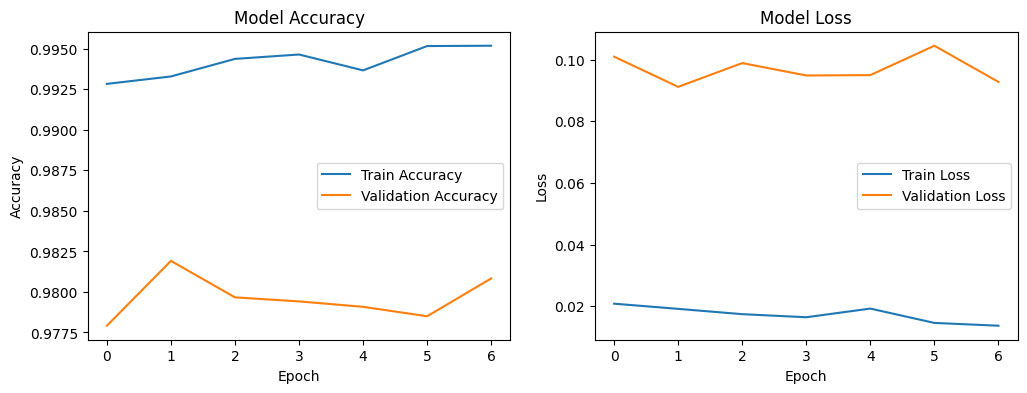

In [33]:
plt.figure(figsize=(12, 4))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()